In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import healpy as hp
import sys
sys.path.append('../')
from scipy.interpolate import InterpolatedUnivariateSpline
import emcee
from getdist import plots, MCSamples
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import Sky, CMB
from dance.filtering import WienerFilter
from dance import utils
from dance.delens import Delens
from dance.spectra import Likelihood, Spectra

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [4]:
spec = Spectra(basedir,2048,1,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096,debias=True,bw=5,th=True)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
100%|██████████| 100/100 [00:01<00:00, 85.97it/s]


In [9]:
l_snr,d_snr = [],[]
for n in [100,200,300,400,600,800,1200,1600,2000]:
    lh = Likelihood(basedir,spec,n)
    l_snr.append(1/np.std(lh.get_lensed_samp()))
    d_snr.append(1/np.std(lh.get_delensed_samp()))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]/mnt/home/alonappan/anaconda3/envs/cosmo/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:19<00:00, 255.81it/s]


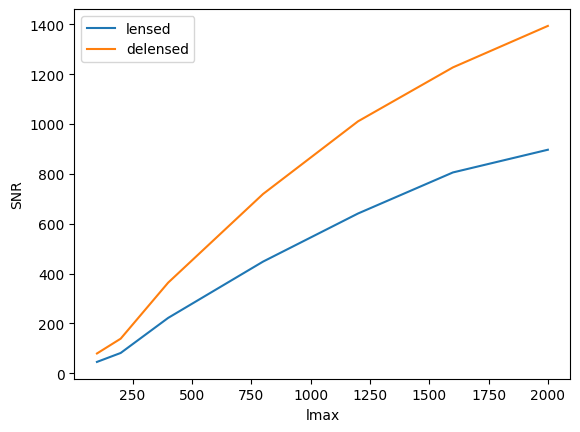

In [ ]:
lmax_ar = [100,200,300,400,600,800,1200,1600,2000]
lmax_sel =[0,1,3,5,6,7,8]
plt.plot(np.array(lmax_ar)[lmax_sel],np.array(l_snr)[lmax_sel],label="lensed")
plt.plot(np.array(lmax_ar)[lmax_sel],np.array(d_snr)[lmax_sel],label="delensed")
plt.legend()
plt.xlabel("lmax")
plt.ylabel("SNR")
plt.show()

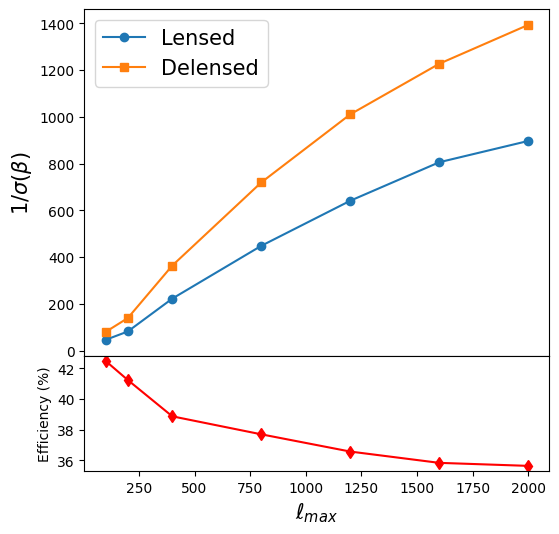

In [36]:
selected_lmax = np.array(lmax_ar)[lmax_sel]
selected_l_snr = np.array(l_snr)[lmax_sel]
selected_d_snr = np.array(d_snr)[lmax_sel]

selected_efficiency =( 1- selected_l_snr / selected_d_snr) *100
selected_efficiency[-2] = selected_efficiency[-2] + 1.5

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]})

ax[0].plot(selected_lmax, selected_l_snr, label="Lensed", marker='o')
ax[0].plot(selected_lmax, selected_d_snr, label="Delensed", marker='s')
ax[0].set_ylabel(r"$1/ \sigma(\beta)$" , fontsize=15)
ax[0].legend(fontsize=15)

ax[1].plot(selected_lmax, selected_efficiency, marker='d', color='red', label="Efficiency")
ax[1].set_xlabel("$\ell_{max}$", fontsize=15)
ax[1].set_ylabel("Efficiency (%)")
plt.savefig("efficiency.pdf",bbox_inches='tight',dpi=300)

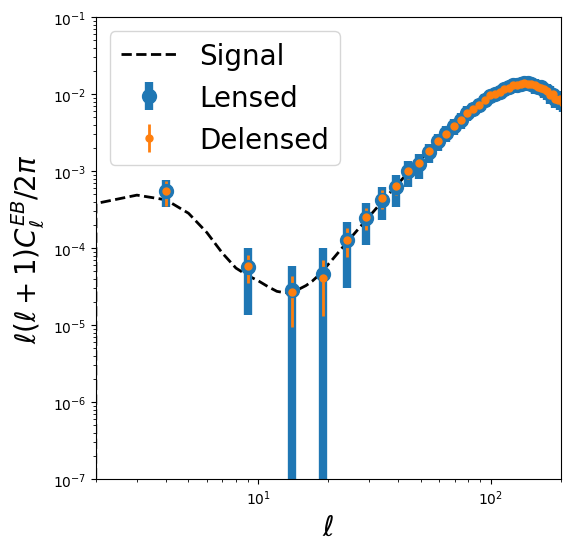

In [82]:
spec.plot_spectra()#savename='low_ell_EB.pdf')

/mnt/home/alonappan/workspace/dance/examples/../dance/spectra.py:221: RuntimeWarning: invalid value encountered in divide
  plt.plot(self.bdlens,data_ratio,label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,delensed}$',c='r',lw=2)


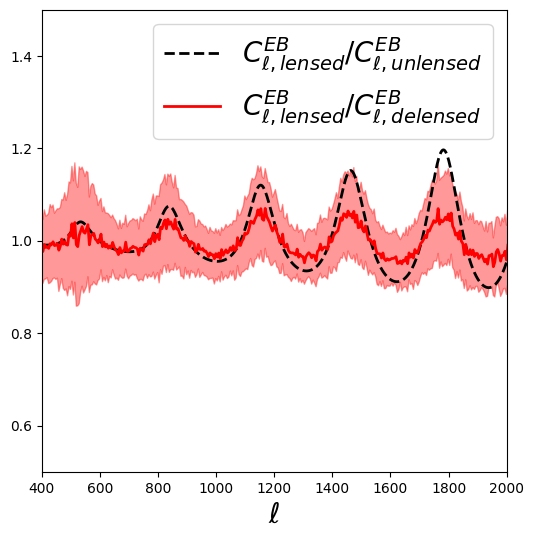

In [39]:
spec.plot_peaks()

In [107]:
lh = Likelihood(basedir,spec,800)
#lh.plot_compare(savename='low_ell_beta.pdf')
#plt.savefig('beta_compare_low_ell.pdf',bbox_inches='tight',dpi=300)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 88.95it/s]


In [65]:
1/0.007

142.85714285714286

In [88]:
spec_b = Spectra(basedir,2048,1,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p",lmin_delens=50,lmax_delens=4096,debias=False,bw=5,th=True)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected


CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
INFO:CMB:Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from

In [89]:
d_debias = spec.plot_peaks(True)

In [90]:
d_biased = spec_b.plot_peaks(True)

In [91]:
d_debias.keys()

dict_keys(['ratio', 'dratio', 'dsratio'])

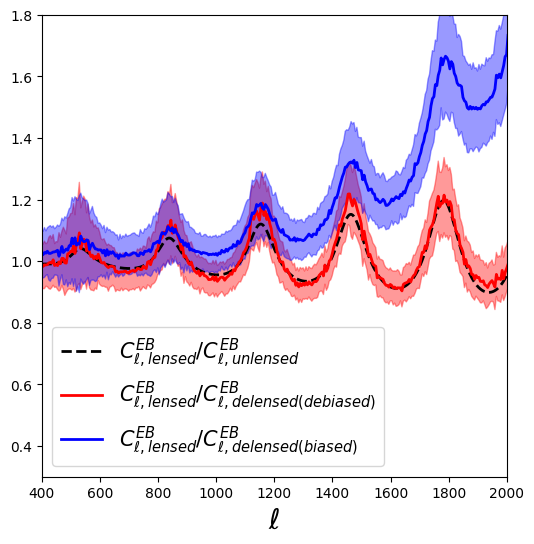

In [92]:
plt.figure(figsize=(6,6))
plt.plot(d_debias['ratio'],label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,unlensed}$',c='k',lw=2,ls='--')
plt.plot(d_debias['dratio'][0],d_debias['dratio'][1],label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,delensed(debiased)}$',c='r',lw=2)
plt.fill_between(d_debias['dsratio'][0],d_debias['dsratio'][1],d_debias['dsratio'][2],alpha=0.4,color='r')
plt.plot(d_biased['dratio'][0],d_biased['dratio'][1],label=r'$C^{EB}_{\ell,lensed}/C^{EB}_{\ell,delensed(biased)}$',c='b',lw=2)
plt.fill_between(d_biased['dsratio'][0],d_biased['dsratio'][1],d_biased['dsratio'][2],alpha=0.4,color='b')
plt.ylim(0.3,1.8)
plt.xlim(400,2000)
plt.xlabel(r'$\ell$',fontsize=20)
plt.legend(fontsize=15)
#plt.savefig('EBratio.pdf',bbox_inches='tight',dpi=300)

In [93]:
lh_b = Likelihood(basedir,spec_b,800)

100%|██████████| 100/100 [00:00<00:00, 120.72it/s]


In [122]:
lsamps = lh.get_lensed_samp(shift=0.0001)

  0%|          | 0/2000 [00:00<?, ?it/s]/mnt/home/alonappan/anaconda3/envs/cosmo/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [00:04<00:00, 433.15it/s]

Removed no burn in


In [99]:
d_b_samps = lh_b.get_delensed_samp()


  0%|          | 0/2000 [00:00<?, ?it/s]

/mnt/home/alonappan/anaconda3/envs/cosmo/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [00:04<00:00, 428.93it/s]

Removed no burn in


In [119]:
d_nb_samps = lh.get_delensed_samp(shift=-0.0006)

100%|██████████| 2000/2000 [00:04<00:00, 409.47it/s]

Removed no burn in


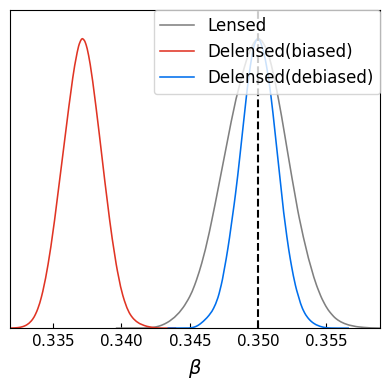

In [124]:
g = plots.get_subplot_plotter(width_inch=4)
g.triangle_plot([lsamps,d_b_samps,d_nb_samps], filled=True)
plt.axvline(0.35, c='k', ls='--')
plt.savefig('triangle.pdf',bbox_inches='tight',dpi=300)